In [1]:
!pip uninstall opencv-python -y
!pip install "opencv-python <= 4.5.5"

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 60.3 MB 56 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
# 내 구글 드라이브에 연동
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# 필요한 패키지와 모듈을 불러옴
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [4]:
# OpenCV 버전 확인
print(cv2.__version__)

4.5.4


In [5]:
min_confidence = 0.5  # detection 으로 인정할 최소 확률(신뢰도) 지정
nms_threshold = 0.4   # non-max suppression threshold
width = 800
file_name = "/content/gdrive/MyDrive/Custom_YOLO4/dataset/fruit04.jpg"

In [6]:
# Load YOLO
net = cv2.dnn.readNetFromDarknet("/content/gdrive/MyDrive/Custom_YOLO4/custom/custom-test-yolo4.cfg", "/content/gdrive/MyDrive/Custom_YOLO4/backup/custom-train-yolo4_final.weights")
classes = []   # detection 할 Object(Class) list 배열을 정의
with open("/content/gdrive/MyDrive/Custom_YOLO4/custom/classes.names", "r") as f:
   classes = [line.strip() for line in f.readlines()]   # 3개의 Object(class)를 구분할 수 있는 Object의 이름을 classes 배열에 넣어준다.
color_lists = np.random.uniform(0, 255, size=(len(classes), 3))  # Object 마다 컬러를 하나씩 다르게 지정

#### Original Image ####


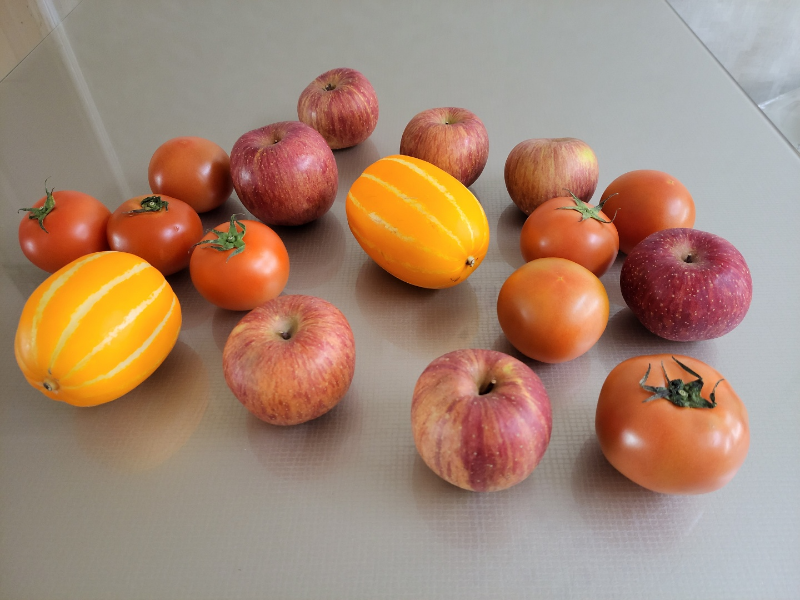

In [7]:
# 원본이미지를 읽어 옵니다. 
img = cv2.imread(file_name)
h, w = img.shape[:2]
height = int(h * width / w)
img = cv2.resize(img, (width, height))

# detection 전에 원본이미지를 Display 
print("#### Original Image ####")
cv2_imshow(img)

In [8]:
model = cv2.dnn_DetectionModel(net)
model.setInputParams(scale=1./255, size=(416, 416), swapRB=True, crop=False)

classIds, scores, boxes = model.detect(img, confThreshold=min_confidence, nmsThreshold=nms_threshold)

In [9]:
print(classIds)
print(scores)
print(boxes)
print(color_lists)

[0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2]
[0.98495805 0.9175115  0.9997926  0.9994869  0.9989356  0.9988647
 0.9988315  0.9987664  0.9986847  0.998274   0.9998245  0.99941826
 0.9991947  0.99919283 0.99915993 0.99851286 0.99776894]
[[341 158 153 130]
 [ 14 253 169 152]
 [596 354 154 141]
 [191 220  99  91]
 [601 169  94  86]
 [147 136  86  76]
 [520 198  99  79]
 [108 192  92  86]
 [ 19 190  91  84]
 [496 258 114 106]
 [620 229 132 112]
 [222 296 135 129]
 [504 137  97  79]
 [231 122 107 105]
 [412 349 139 143]
 [401 107  88  81]
 [296  69  83  78]]
[[106.67597124 199.72795973 145.28682553]
 [240.43880418 239.39665604 117.62966873]
 [251.16881278  84.64443022 133.2790084 ]]


0 Oriental melon 98.50%
1 Oriental melon 91.75%
2 Tomato 99.98%
3 Tomato 99.95%
4 Tomato 99.89%
5 Tomato 99.89%
6 Tomato 99.88%
7 Tomato 99.88%
8 Tomato 99.87%
9 Tomato 99.83%
10 Apple 99.98%
11 Apple 99.94%
12 Apple 99.92%
13 Apple 99.92%
14 Apple 99.92%
15 Apple 99.85%
16 Apple 99.78%


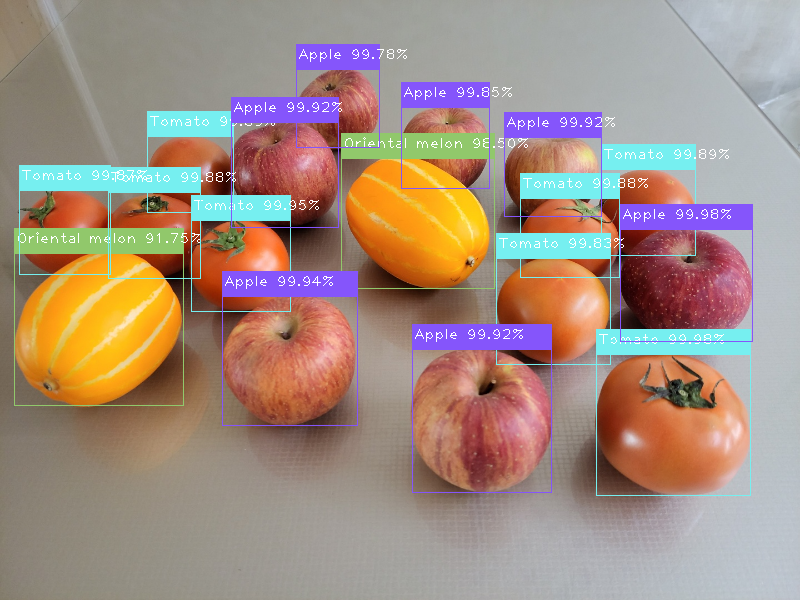

In [10]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    x, y, w, h = boxes[i]
    label = '{} {:,.2%}'.format(str(classes[classIds[i]]), scores[i])
    print(i, label)
    color = color_lists[classIds[i]]
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 1)
    cv2.rectangle(img, (x, y-25), (x + w, y), color, -1)
    cv2.putText(img, label, (x+2, y - 10), font, 1, (255, 255, 255), 1)

cv2_imshow(img)